In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import glob
import os
import pandas as pd
from enduse_comparison_functions import combine_enduse_from_csv, create_two_way_correspondences, create_enduse_by_country, check_enduse_integrity
from enduse_comparison_plots import country_all_enduses_panel

In [3]:
gloria_csv_path = os.path.join(os.getcwd(), "input_data", "GLORIA_basic_WIO_MF_EUT_end_use_shares_4_crosschecking")
csv_glob = os.path.join(gloria_csv_path, "*.csv")
csv_files = glob.glob(csv_glob)

In [4]:
all_enduses = combine_enduse_from_csv(csv_files)

In [6]:
gloria_exiobase_correspondence = pd.read_excel(os.path.join("input_data", "2023_GLORIA_EXIOBASE_corresp_aggr.xlsx"), sheet_name="values")

In [7]:
correspondences = gloria_exiobase_correspondence.to_dict("records")

In [8]:
correspondence_gloria_to_exio, correspondence_exio_to_gloria, equal_names = create_two_way_correspondences(correspondences)

In [9]:
country_material_enduse = create_enduse_by_country(all_enduses, gloria_exiobase_correspondence)

In [ ]:
len(country_material_enduse.keys())

In [17]:
invalids = check_enduse_integrity(country_material_enduse)

Enduses below 100 in Armenia Aluminum
Enduses below 100 in Armenia Asphalt
Enduses below 100 in Armenia Bricks
Enduses below 100 in Armenia Chromium
Enduses below 100 in Armenia Concrete
Enduses below 100 in Armenia Container
Enduses below 100 in Armenia Copper
Enduses below 100 in Armenia Flat
Enduses below 100 in Armenia IronSteel
Enduses below 100 in Armenia Lead
Enduses below 100 in Armenia Manganese
Enduses below 100 in Armenia Nickel
Enduses below 100 in Armenia Paper
Enduses below 100 in Armenia Plastics
Enduses below 100 in Armenia Tin
Enduses below 100 in Armenia Wood
Enduses below 100 in Armenia Zinc
Enduses below 100 in Azerbaijan Aluminum
Enduses below 100 in Azerbaijan Asphalt
Enduses below 100 in Azerbaijan Bricks
Enduses below 100 in Azerbaijan Chromium
Enduses below 100 in Azerbaijan Concrete
Enduses below 100 in Azerbaijan Container
Enduses below 100 in Azerbaijan Copper
Enduses below 100 in Azerbaijan Flat
Enduses below 100 in Azerbaijan IronSteel
Enduses below 100 in

In [18]:
invalids

{('Armenia',
  'Aluminum'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Asphalt'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Bricks'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Chromium'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Concrete'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Container'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Copper'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Flat'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'IronSteel'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Lead'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Manganese'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Nickel'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Paper'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Plastics'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Tin'): year
 1990    92.857143
 d

In [19]:
# export this to excel
for country, df_dict in country_material_enduse.items():
    filename = "gloria_output/GLORIA_" + country + "_enduses.xlsx"
    with pd.ExcelWriter(filename) as writer:
        for material, df in df_dict.items():
            df.to_excel(writer, sheet_name=material, index=True)


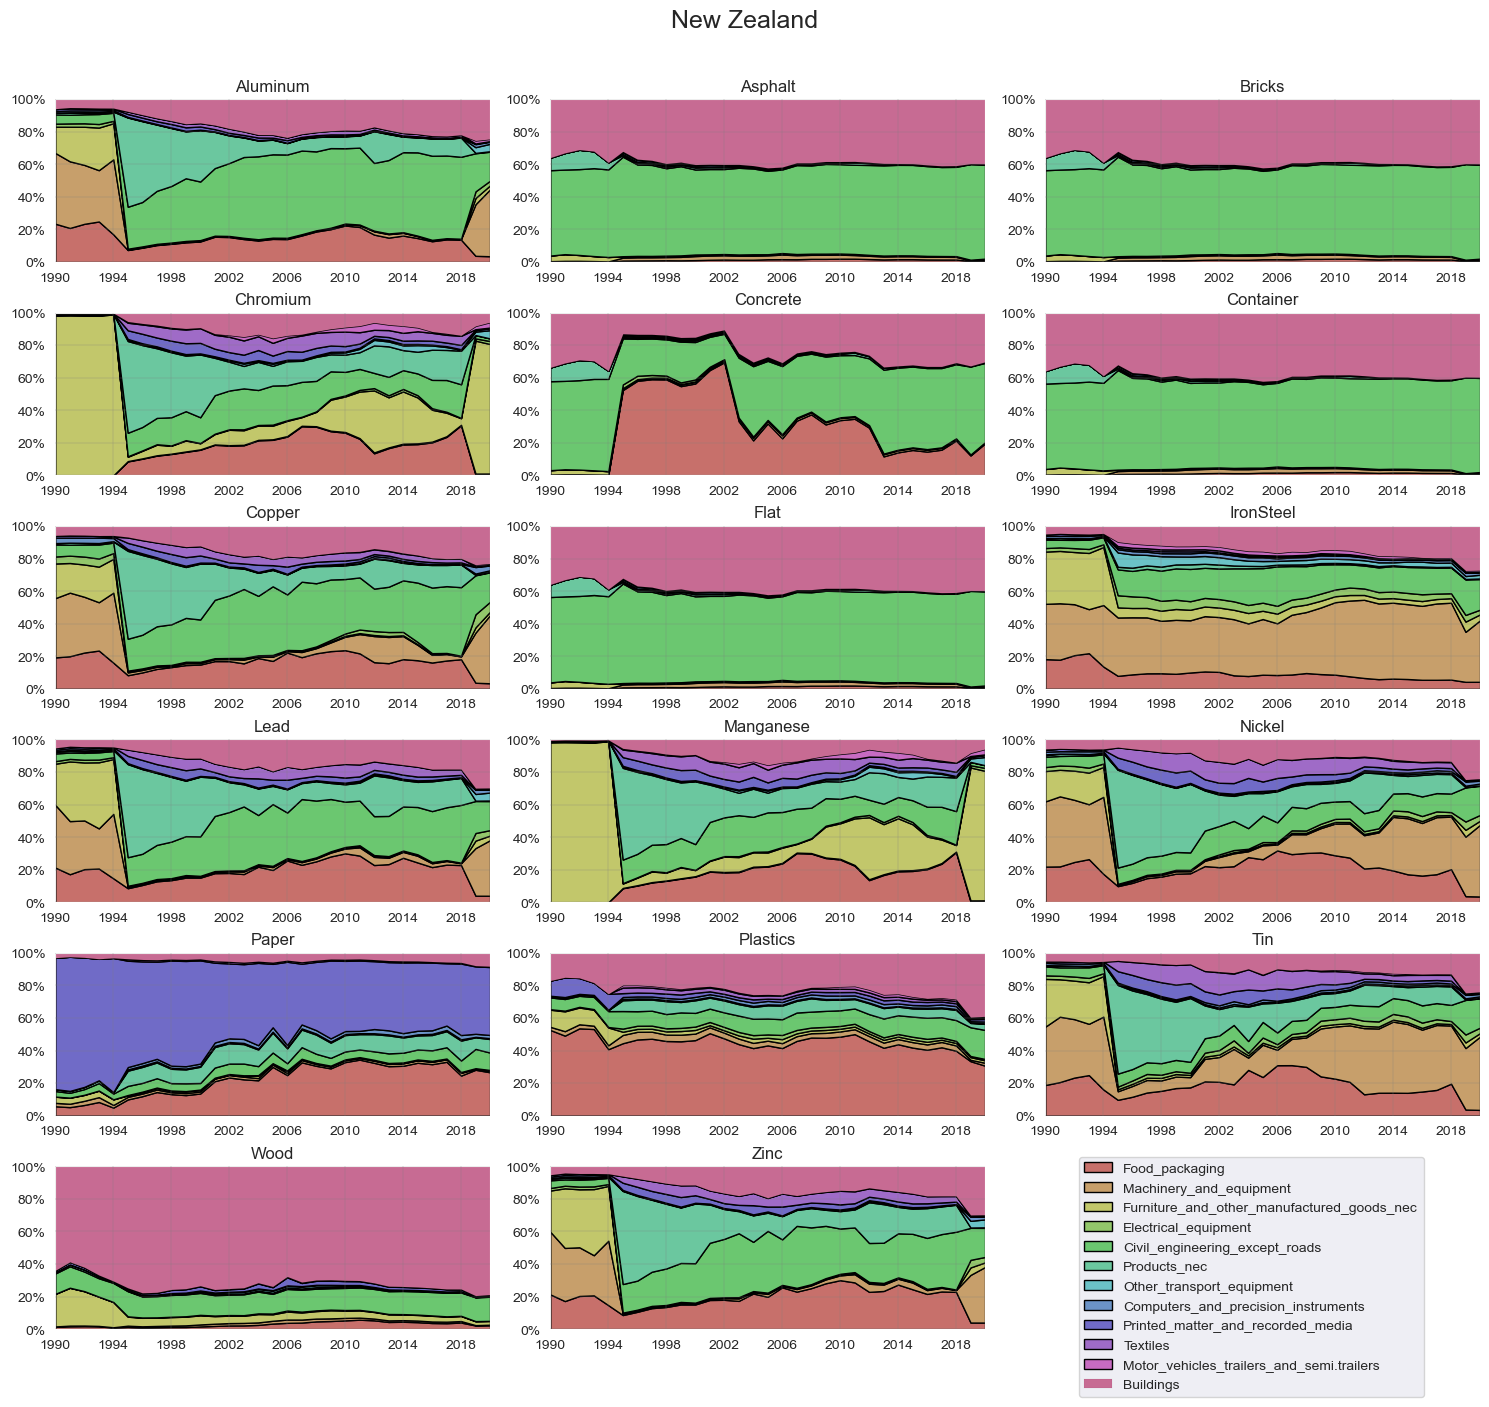

In [120]:
country_all_enduses_panel(country_material_enduse["New Zealand"], "New Zealand", False)

In [121]:
for country, df_dict in country_material_enduse.items():
    plot_title = "Gloria enduses " + country
    country_all_enduses_panel(df_dict, plot_title, True)

In [128]:
pd.DataFrame(list(country_material_enduse.keys())).to_excel("gloria_countries.xlsx", engine="openpyxl")

In [131]:
country_material_enduse["Albania"]

{'Aluminum': year                                             1990       1991       1992  \
 Enduse                                                                        
 Food_packaging                               0.398937   1.432752   2.147386   
 Machinery_and_equipment                     12.771121  19.407269  17.491924   
 Furniture_and_other_manufactured_goods_nec   8.078946  10.869142  15.525123   
 Electrical_equipment                        24.970841  21.023136  21.631774   
 Civil_engineering_except_roads               7.135399   4.194729   4.399239   
 Products_nec                                 0.408392   1.212164   1.276035   
 Other_transport_equipment                    8.528955   6.430604   5.038631   
 Computers_and_precision_instruments         13.531751  14.932411  13.276882   
 Printed_matter_and_recorded_media            0.237667   0.930451   0.951318   
 Textiles                                     0.268895   0.866463   0.912481   
 Motor_vehicles_trailers_and